In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import Datasets

In [2]:
df = pd.read_csv("data.csv")
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Preprocess the data

In [3]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [6]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [7]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


## Train the model

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [12]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7, name='hidden_layer_1'))
model.add(Dense(7, activation='relu', name='hidden_layer_2'))

model.add(Dense(1, activation='linear', name='output_layer'))

model.summary()

c:\Users\7200\AppData\Local\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='mse', optimizer='Adam')
history = model.fit(X_scaled, y, epochs=600, validation_split=0.2)
history = history.history

Epoch 1/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3011 - val_loss: 0.2555
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2564 - val_loss: 0.2011
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2104 - val_loss: 0.1631
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1922 - val_loss: 0.1357
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1618 - val_loss: 0.1144
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1468 - val_loss: 0.0989
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1227 - val_loss: 0.0872
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1166 - val_loss: 0.0753
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0921 - val_loss: 0.0640
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0902 - val_loss: 0.0522
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0731 - val_loss: 0.0441
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

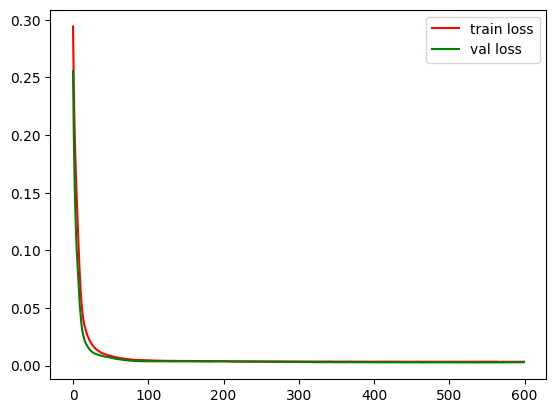

In [14]:
plt.plot(history['loss'], label='train loss', color='red')
plt.plot(history['val_loss'], label='val loss', color='green')
plt.legend()
plt.show()

In [ ]:
model.save("model.keras")

df_new = pd.DataFrame(X_scaled)
df_new.head()
df_new.columns = X.columns